In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [7]:
import pickle
with open('mnist_small_py2_3.pkl', 'rb') as f:
    train_set = pickle.load(f)

In [8]:
data =train_set['X']
label = train_set['Y']

In [9]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
 data, label, test_size=1/7.0, random_state=0)

In [28]:
accuracy = np.zeros(10)
#Create KNN Classifier
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(train_img, train_lbl)
    #Predict the response for test dataset
    y_pred = knn.predict(test_img)
    #accuracy
    accuracy[k-1] = metrics.accuracy_score(test_lbl, y_pred)

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [30]:
K = [1,2,3,4,5,6,7,8,9,10]

In [31]:
accuracy

array([0.94541638, 0.93282015, 0.94611617, 0.943317  , 0.94471659,
       0.93561931, 0.93701889, 0.93561931, 0.93561931, 0.93351994])

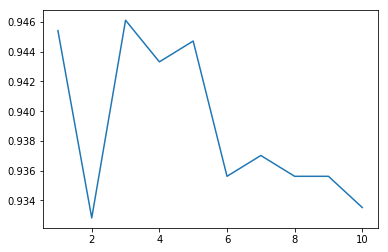

In [32]:
plt.plot(K , accuracy )
plt.show()

In [33]:
    knn = KNeighborsClassifier(n_neighbors=3)
    #Train the model using the training sets
    knn.fit(train_img, train_lbl)
    #Predict the response for test dataset
    y_pred = knn.predict(test_img)

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
import seaborn as sns
from sklearn import metrics

In [36]:
confusion = metrics.confusion_matrix(test_lbl, y_pred)


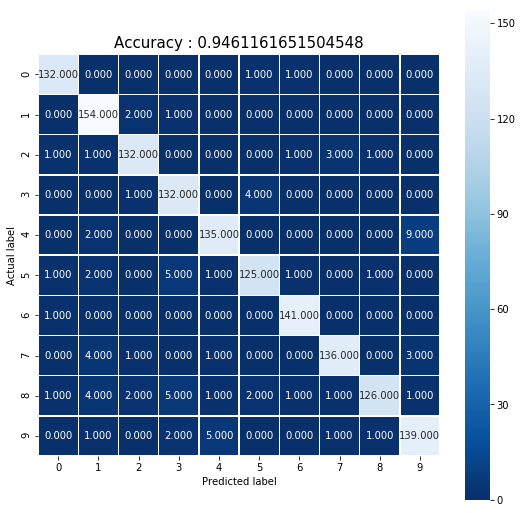

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy : {0}'.format(metrics.accuracy_score(test_lbl, y_pred))
plt.title(all_sample_title, size = 15);

In [42]:
index = 0
misclassifiedIndexes = []
for i in range(len(test_lbl)):
    if test_lbl[i,0] != y_pred[i] :
        misclassifiedIndexes.append(i)
        index +=1

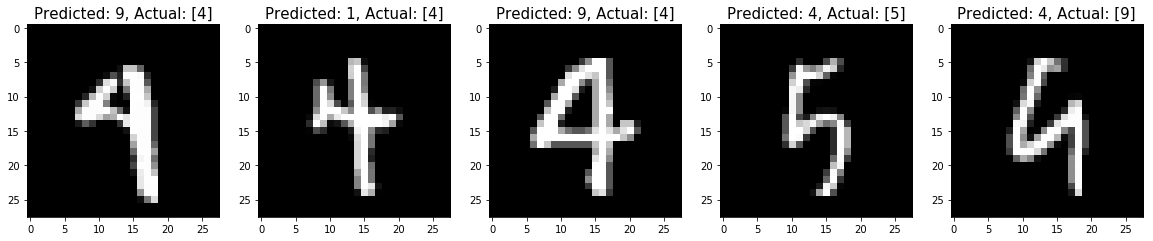

In [45]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], test_lbl[badIndex]), fontsize = 15)